This notebook explores the **Insurance Claims Dataset**, analyzing key features and their impact on claim status. The goal is to prepare data for predictive modeling.



In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import scipy.stats as stats
import os
from pathlib import Path


In [15]:
#Load our Data 

project_root = Path().resolve().parent  # Moves up one directory from `code/`

# Construct the correct relative path
data_path = project_root / "data" / "Insurance_claims_data.csv"

# Load the dataset
insurance = pd.read_csv(data_path)
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [16]:
insurance.head()


,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


| **Feature**                      | **Description** |
|-----------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------|
| `policy_id`                      | Unique identifier for the insurance policy. |
| `subscription_length`            | Duration for which the insurance policy is active. |
| `customer_age`                   | Age of the insurance policyholder, influencing the likelihood of claims. |
| `vehicle_age`                    | Age of the insured vehicle, affecting the probability of claims due to wear and tear. |
| `model`                          | Model of the vehicle, which impacts claim frequency due to model-specific characteristics. |
| `fuel_type`                      | Type of fuel the vehicle uses (e.g., Petrol, Diesel, CNG), influencing risk profile. |
| `max_torque`, `max_power`        | Engine performance characteristics related to mechanical condition and claim risks. |
| `engine_type`                    | Type of engine, impacting maintenance and claim rates. |
| `displacement`, `cylinder`       | Specifications affecting vehicle performance and claim history. |
| `region_code`                    | Geographical region of the policyholder, as claim patterns vary by location. |
| `region_density`                 | Population density of the policyholder’s region, potentially correlating with accident and claim frequencies. |
| `airbags`                        | Number of airbags in the vehicle, indicating safety level and claim probability. |
| `is_esc`, `is_adjustable_steering`, `is_tpms` | Vehicle safety features that may reduce the likelihood of claims. |
| `is_parking_sensors`, `is_parking_camera` | Parking aids that might influence claim probability, especially in urban areas. |
| `rear_brakes_type`               | Type of rear brakes, which could be related to vehicle safety. |
| **Various binary indicators**    | Features such as `steering_type`, `turning_radius`, `length`, `width`, `gross_weight`, etc., contributing to the vehicle’s risk profile. |
| `claim_status`                   | Target variable: 1 if a claim was made, 0 otherwise. |

---

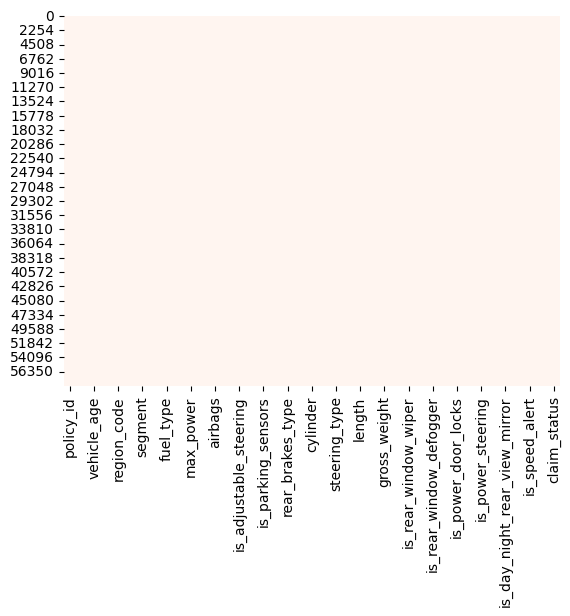

/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


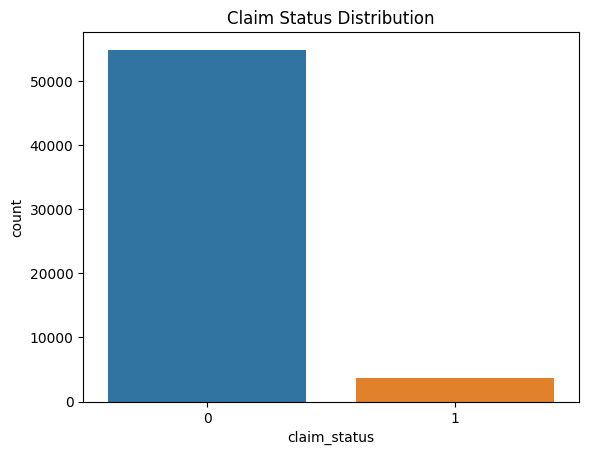

In [20]:
#Initial Exploration


insurance.shape

# Summary statistics
insurance.describe()

# Check for missing values
insurance.isnull().sum()
sns.heatmap(insurance.isnull(),cbar=False,cmap='Reds')
plt.show()

# Check target distribution
sns.countplot(x='claim_status', data=insurance)
plt.title("Claim Status Distribution")
plt.show()

There are no nulls and there is a large class inbalance in the data where more people do not have claims.

Five Point summary of Numerical attributes 


In [21]:
insurance.describe()


,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,gross_weight,ncap_rating,claim_status
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.111688,1.388473,44.823935,18826.858667,3.137066,1162.355851,3.626963,4.852893,3850.476891,1672.233667,1385.276813,1.759950,0.063968
std,4.142790,1.134413,6.935604,17660.174792,1.832641,266.304786,0.483616,0.228061,311.457119,112.089135,212.423085,1.389576,0.244698
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,4.500000,3445.000000,1475.000000,1051.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,4.600000,3445.000000,1515.000000,1185.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,4.800000,3845.000000,1735.000000,1335.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1510.000000,3.000000,0.000000
max,14.000000,20.000000,75.000000,73430.000000,6.000000,1498.000000,4.000000,5.200000,4300.000000,1811.000000,1720.000000,5.000000,1.000000


/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


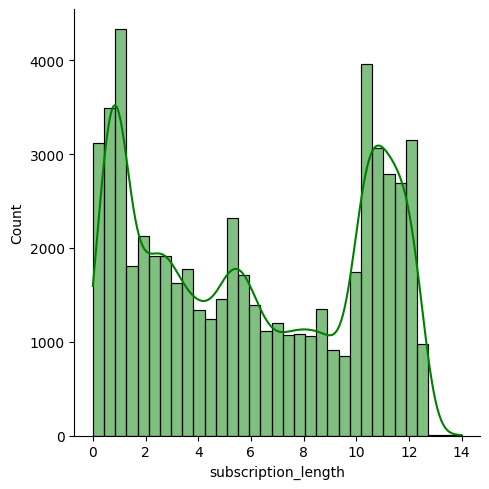

In [23]:
charges = sns.displot(insurance['subscription_length'], color="green", kde=True)

The subscription length has a bimodal distribution. So the insurance company has many old and new subscribers. 

/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


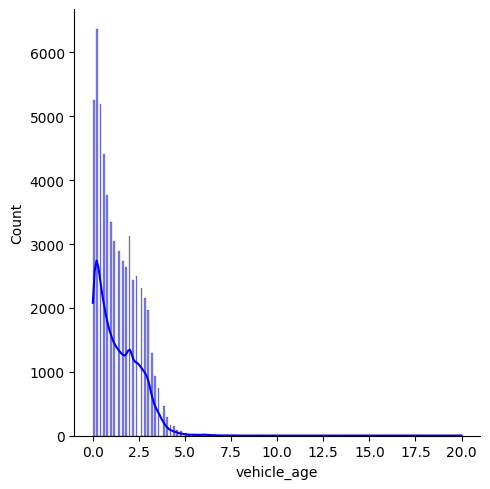

In [24]:
# Vechical Age 

v_age = sns.displot(insurance['vehicle_age'], color="blue", kde=True)

The vehicle age feature values skew towards the left, meaning that the majority of policy holders have new cars. 

/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

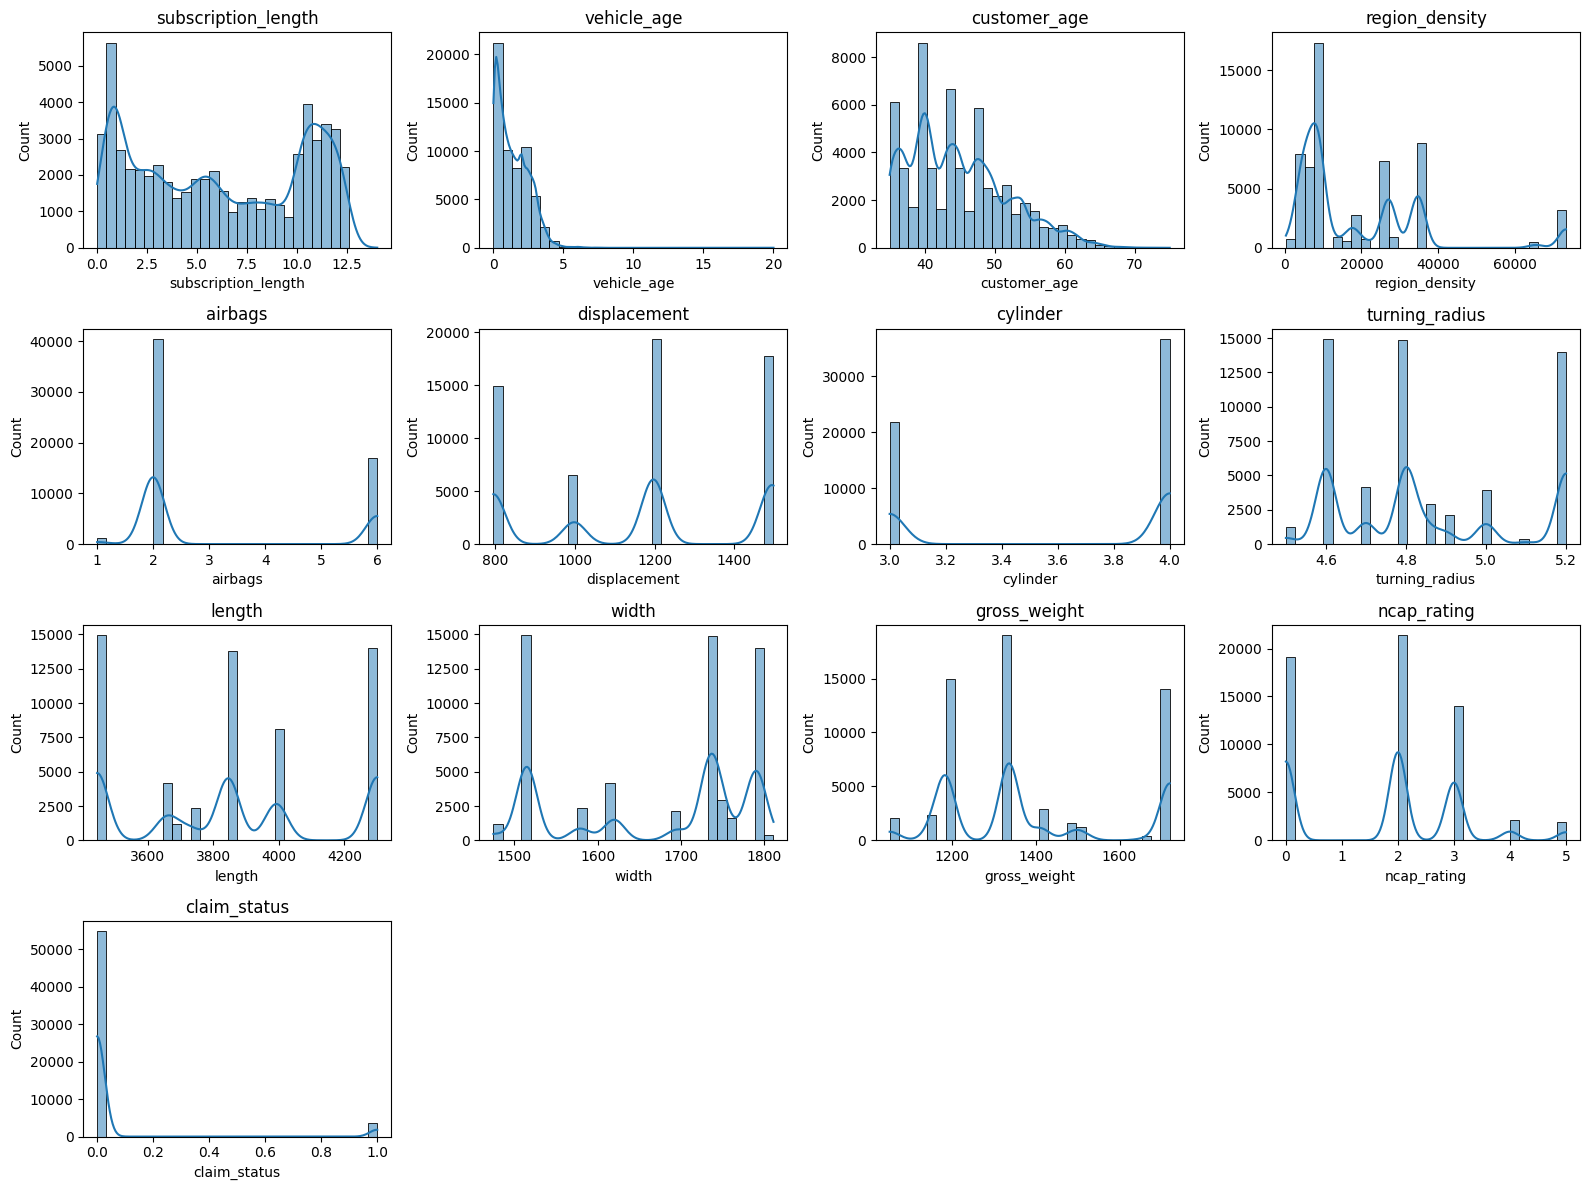

In [28]:

# Select numeric columns
numeric_features = ["subscription_length", "vehicle_age", "customer_age", "region_density", 
                    "airbags", "displacement", "cylinder", "turning_radius", "length", "width",
                    "gross_weight", "ncap_rating", "claim_status"]

num_features = len(numeric_features)  # Total number of features

# Dynamically calculate grid size (rows, cols)
cols = 4  # Number of columns per row
rows = -(-num_features // cols)  # Ceiling division to get number of rows

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 12))  
axes = axes.flatten()

# Loop through and plot each feature
for i, col in enumerate(numeric_features):
    sns.histplot(insurance[col], bins=30, kde=True, ax=axes[i])  
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


There a few observations to make of the numerical features. It is clear some are continous variables while others are categorical. Our continous variables are: 

- `vehicle_age`
- `customer_age`
- `subscription_length`
- `region_density`
- `airbags`
- `turning_radius`
- `width`
- `gross_weight`

Our categorical values are:

- `claim_status`
- `ncap_rating`
- `cylinder`
- `displacement`


Our policy holders ages peak at around 40, no policy holders are below the age of 35. Most policy holders do not live in high density eras, however a small peak in the high density era suggests that there are still outliers in high density eras, making them at more risk of car accidents. 


| **NCAP Rating** | **Safety Level**  | **Description** |
|---------------|----------------|------------------|
| **0 Stars**   | Very Poor      | High risk of serious injury in a crash. |
| **1 Star**    | Poor           | Minimal safety features, high injury risk. |
| **2 Stars**   | Below Average  | Some safety features, but still risky. |
| **3 Stars**   | Average        | Meets basic safety requirements. |
| **4 Stars**   | Good           | Well-equipped with safety features. |
| **5 Stars**   | Excellent      | Highest level of crash protection and safety tech. |

---

From the graph, most policy holders own cars that are either Very Poor, Below Average, and Average. This leaves a signifcant amount of policy holders in risk. From the graphs it is clear that most policy holders are driving younger and low-rated vechicles. 

There merits additionally analysis to look into wether the lower-rated/younger vechiles have higher claim frequency. Furthermore, most vechiles have 2 airbads and very few have 1 or 3-5 airbags. Additional analysis will also be implemented on whether more airbags leads to lower-claim severity. 



## Distribution of Categorical Columns

/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

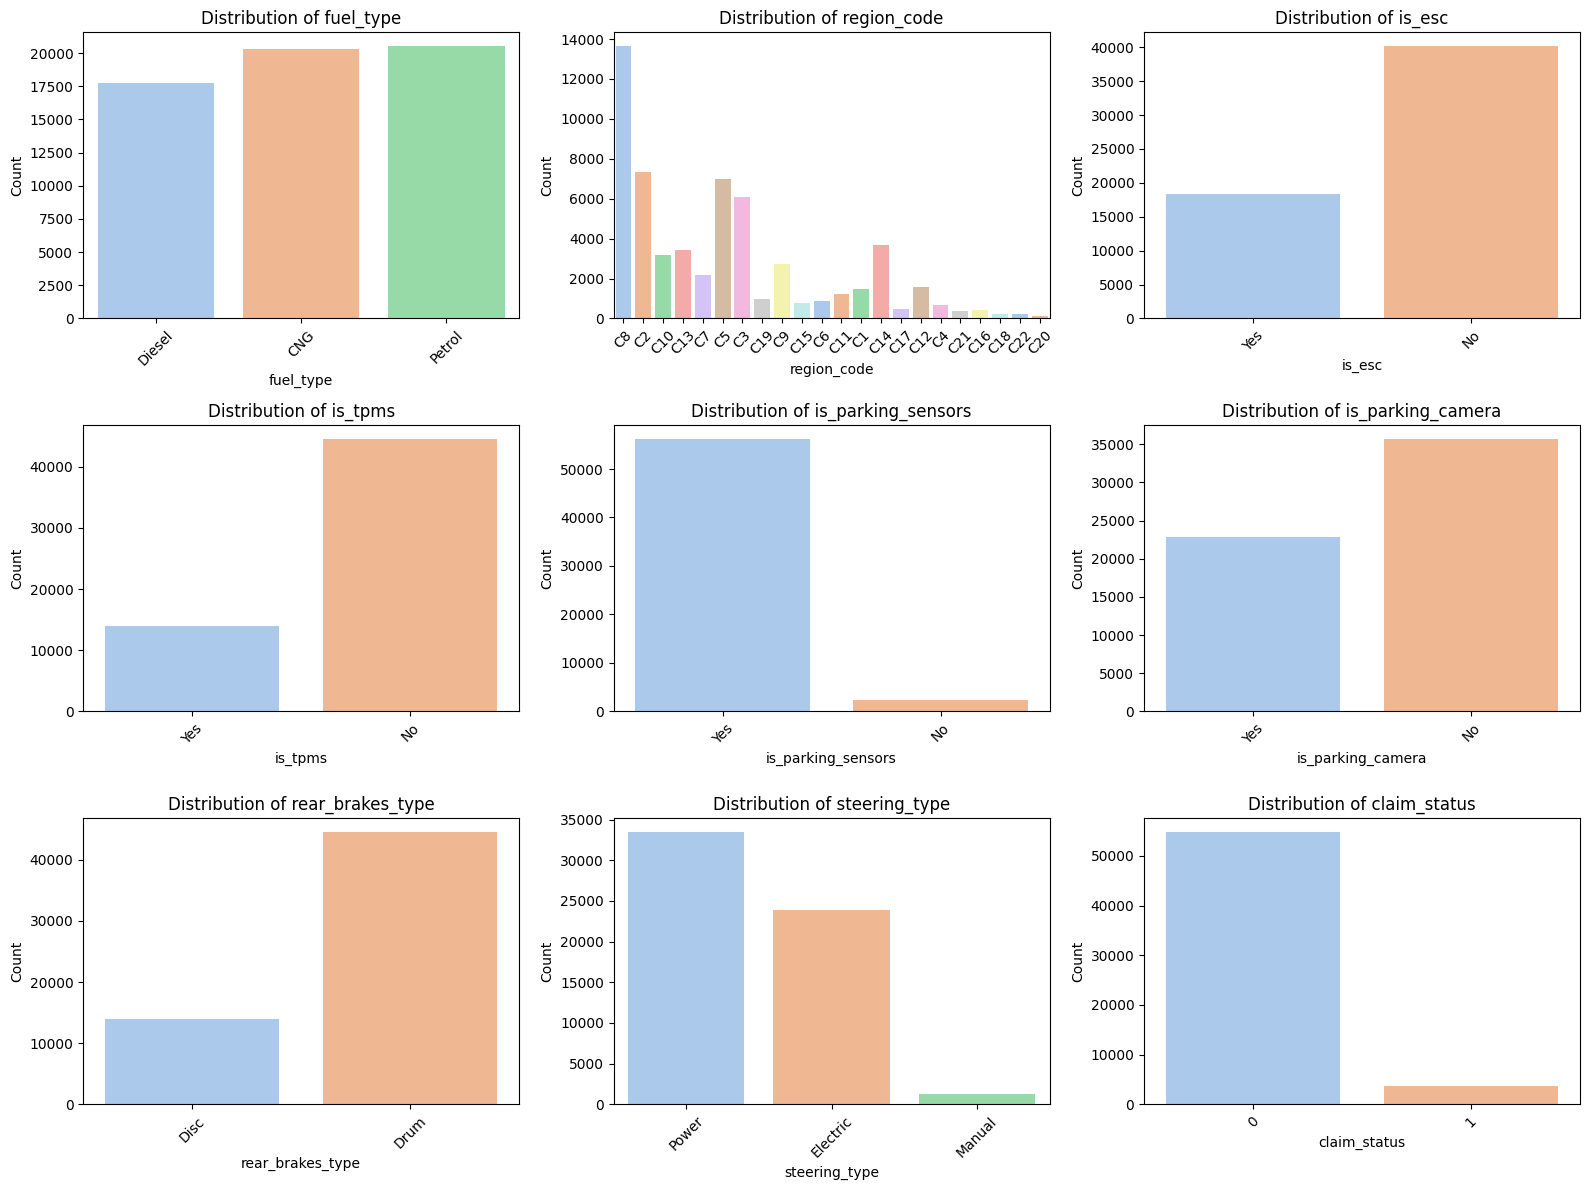

/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


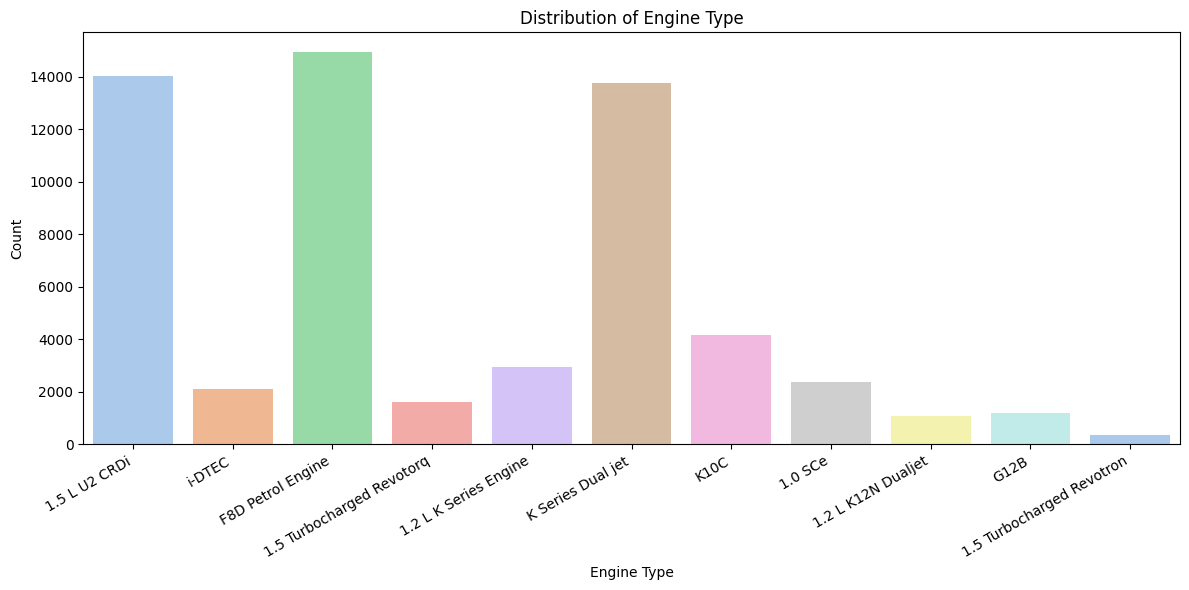

In [36]:
# Select categorical columns
categorical_features = ["fuel_type", "region_code", "is_esc", "is_tpms", 
                        "is_parking_sensors", "is_parking_camera", "rear_brakes_type", 
                        "steering_type", "claim_status"]  

num_features = len(categorical_features)  # Total number of categorical features

# Dynamically calculate grid size (rows, cols)
cols = 3  # Number of columns per row
rows = -(-num_features // cols)  # Ceiling division to get number of rows

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 12))  
axes = axes.flatten()

# Loop through and plot each feature
for i, col in enumerate(categorical_features):
    sns.countplot(x=insurance[col], ax=axes[i], palette="pastel")  
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))  # Increase figure size
sns.countplot(x=insurance["engine_type"], palette="pastel")  
plt.title("Distribution of Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right", fontsize=10)  # Rotate labels, align to right
plt.tight_layout()
plt.show()


Distribution of fuel type
- Most policy holders use Petrol and CNG however there is quite an even distribution between the options of using diesel, CNG, and Petrol. 

Distirbution of the Engine Type
- Policy holders own cars with various engines however the three most popular engines are the 1.5 L U2 CRDI, F8D Petrol Engine, and the K Series Engine. 

Distribution of Region
- The majority of policy holders are from the region of C8

Distribution of Electronic Stability Control (ESC)
- Most policy holders do not have cars with ESC

Distribution of Tire Pressure Monitoring System (TPMS): 
- Most policy holders do not have cars with TPMS

Distribution of Parking Senors 
- Most policy holders do have cars with parking sensors

Distribution of Parking Cameras
- Most policy holders do not have cars with parking cameras

Distribution of Rear Brakes type
- Most policy holders have cars with Drum brake types

Distribution of Steering type
- Most policy holders have cars with Power Steering type. Second most popular steering type is electic. Very few have manual steering type. 

/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


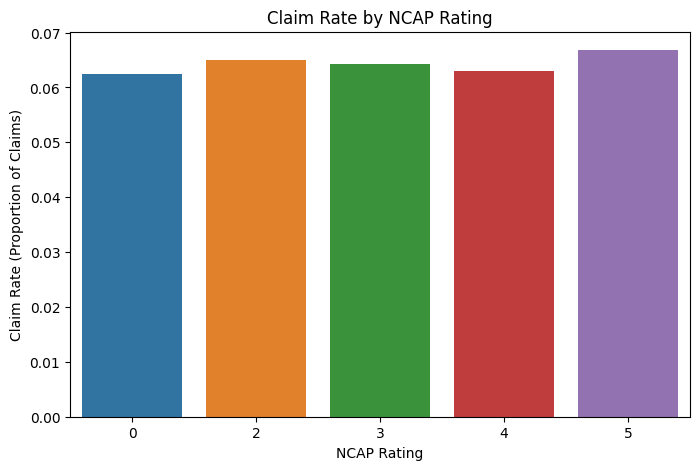

In [32]:
#NCAP rating vs claim status

# Calculate claim rate per NCAP rating
claim_rate = insurance.groupby("ncap_rating")["claim_status"].mean()

# Convert to DataFrame for plotting
claim_rate_df = claim_rate.reset_index()

# Plot claim rate per NCAP rating
plt.figure(figsize=(8,5))
sns.barplot(x="ncap_rating", y="claim_status", data=claim_rate_df)
plt.title("Claim Rate by NCAP Rating")
plt.xlabel("NCAP Rating")
plt.ylabel("Claim Rate (Proportion of Claims)")
plt.show()




Claim rate by NCAP rating delivers minimal insights into policy holder behaviors. The claim rate is small and increases only slightly with cars with 5 airbags. It is not enough to make a definitive statement on policy-holders behavior.

vehicle_age           -0.028172
region_density        -0.017808
turning_radius         0.002724
airbags                0.002789
ncap_rating            0.003800
gross_weight           0.003894
length                 0.006495
displacement           0.007678
width                  0.009947
cylinder               0.013434
customer_age           0.022234
subscription_length    0.078738
claim_status           1.000000
Name: claim_status, dtype: float64


<Axes: >

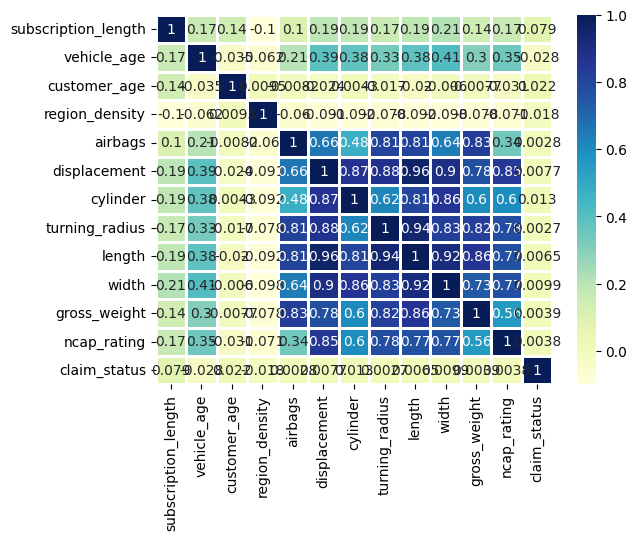

In [37]:
# Drop non-numeric columns
insurance_numeric = insurance.select_dtypes(include=['number'])  # Keeps only numeric columns

# Compute correlation with claim_status
correlation = insurance_numeric.corr()["claim_status"].sort_values()

# Display top correlations
print(correlation)


sns.heatmap(insurance_numeric.corr(),cmap='YlGnBu',annot=True , linecolor='white',linewidths=1)


# Correlation Analysis of Features with Claim Status

## Understanding Correlation Values
The correlation values measure the **strength and direction** of the relationship between each feature and `claim_status`.

- **Correlation Range:**
  - **`+1.0`** → Strong **positive** correlation (as the feature increases, claims increase)
  - **`0.0`** → **No correlation** (feature has no impact on claims)
  - **`-1.0`** → Strong **negative** correlation (as the feature increases, claims decrease)

---

## Key Takeaways from Correlation Analysis
The following table summarizes the correlation of each feature with claim status:

| **Feature**                | **Correlation** | **Interpretation** |
|---------------------------|---------------|--------------------|
| **Subscription Length (0.0787)** | Weak Positive | Longer insurance duration **slightly** increases claim likelihood. Possibly because longer-term policies mean higher exposure to risk. |
| **Customer Age (0.0222)** | Weak Positive | Slightly older customers **tend to file more claims**, but the effect is small. |
| **Vehicle Age (-0.0281)** | Weak Negative | Older vehicles have **a slightly lower chance of claims** (could be due to experienced drivers or lower vehicle usage). |
| **Region Density (-0.0178)** | Weak Negative | Lower claim rates in **low-density regions** (possibly due to fewer accidents in rural areas). |
| **Airbags (0.0028)** | Near Zero | Airbags **don’t strongly influence claim likelihood**, but they may still affect claim severity. |
| **NCAP Rating (0.0038)** | Near Zero | Safety rating doesn’t directly impact claim likelihood, but it may reduce **claim severity**. |
| **Turning Radius (0.0027)** | Near Zero | No real impact on claims. |
| **Gross Weight (0.0038), Length (0.0064), Displacement (0.0077), Width (0.0099), Cylinder (0.0134)** | Near Zero | Vehicle size and engine specs **have almost no impact** on claim frequency. |

---

**No Strong Predictors**:  
   - None of these features alone **strongly predict claims** (all values are close to `0.0`).  

**Subscription Length & Customer Age Matter (Slightly)**:  
   - **Longer policies → More claims** (weak effect).  
   - **Older drivers → Slightly more claims**.  

**Vehicle Safety Features Aren’t Driving Claims Directly**:  
   - **Airbags, NCAP rating, and gross weight** don’t show strong correlations.  
   - However, they **might affect claim severity (cost of claims), not claim frequency**.  

**Geography & Vehicle Age Have Small Effects**:  
   - Older vehicles and rural regions **see slightly fewer claims**.  


/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


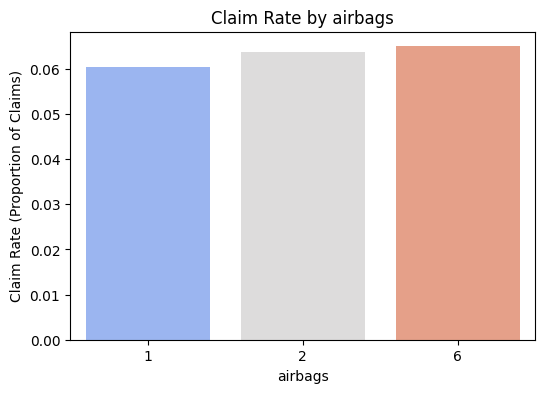

/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


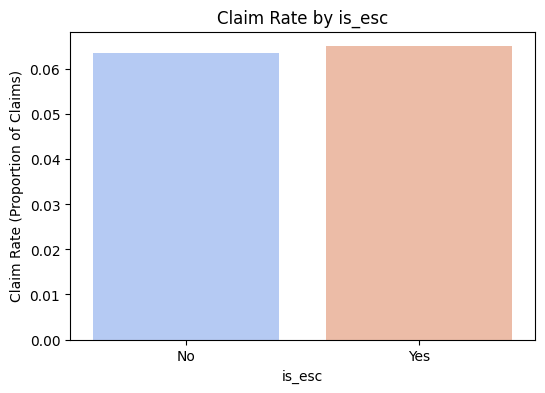

/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


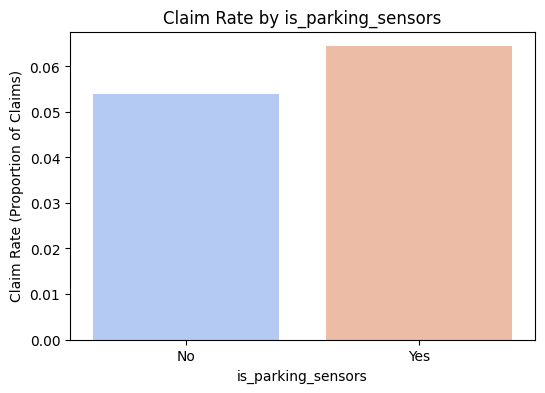

/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


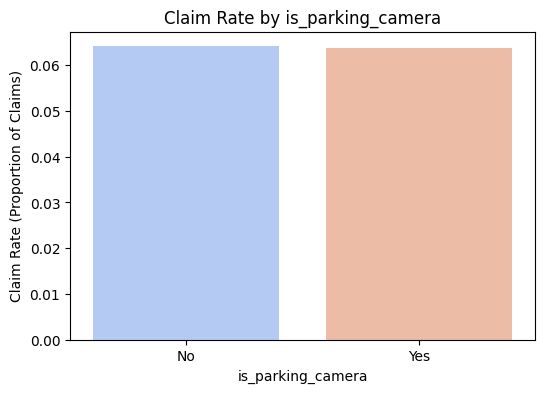

In [34]:
safety_features = ["airbags", "is_esc", "is_parking_sensors", "is_parking_camera"]

for feature in safety_features:
    claim_rate = insurance.groupby(feature)["claim_status"].mean()
    
    plt.figure(figsize=(6,4))
    sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="coolwarm")
    plt.title(f"Claim Rate by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Claim Rate (Proportion of Claims)")
    plt.show()


The graphs above further illustrate that the differences in claim rate are small (~6-7%), so while there's a trend with cars with more safety features, it is not strong enough to conclude any set behavior for the policy holders. 